In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('./diabetes.csv') #ƒê·ªçc D·ªØ Li·ªáu
df.head() # L·∫•y 5 d√≤ng ƒë·∫ßu ti√™n c·ªßa d·ªØ li·ªáu


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.info() # Th√¥ng tin v·ªÅ d·ªØ li·ªáu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.duplicated().sum()# Ki·ªÉm tra d·ªØ li·ªáu tr√πng l·∫∑p



np.int64(0)

In [ ]:
df.isna().sum() #Ki·ªÉm Tra d·ªØ li·ªáu b·ªã thi·∫øu 0 t∆∞∆°ng ·ª©ng ko c√≥ d·ªØ li·ªáu thi·∫øu

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe() # Th·ªëng k√™ m√¥ t·∫£ d·ªØ li·ªáu (count l√† s·ªë l∆∞·ª£ng, mean l√† trung b√¨nh, std l√† ƒë·ªô l·ªách chu·∫©n, min l√† gi√° tr·ªã nh·ªè nh·∫•t, 25%, 50%, 75% l√† c√°c ph√¢n v·ªã, max l√† gi√° tr·ªã l·ªõn nh·∫•t)

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
df['Outcome'].value_counts() # Th·ªëng k√™ s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã trong c·ªôt Outcome

Outcome
0    500
1    268
Name: count, dtype: int64

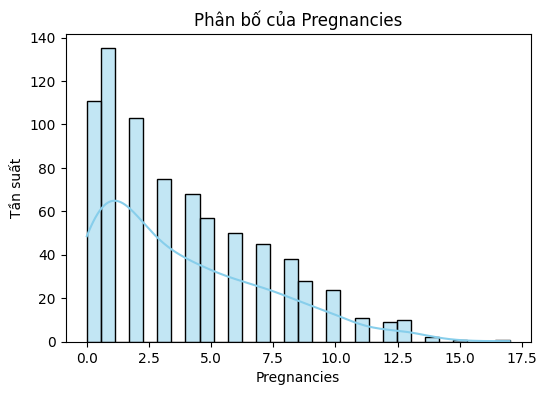

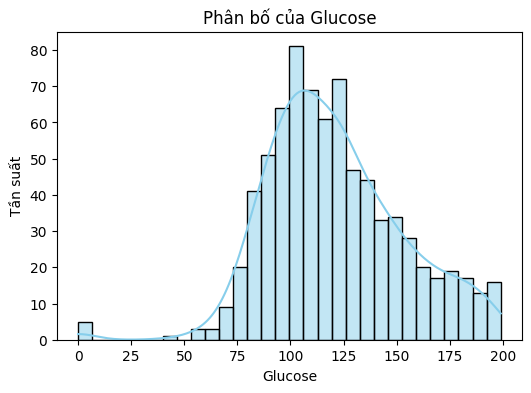

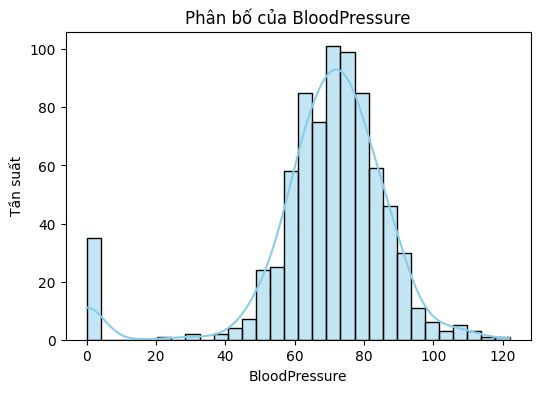

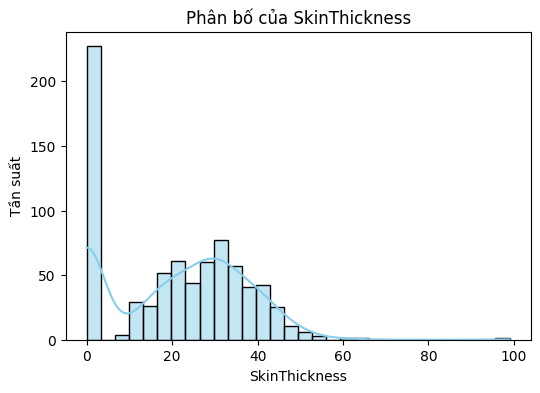

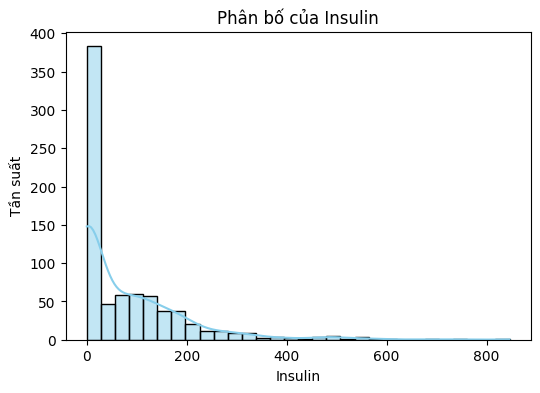

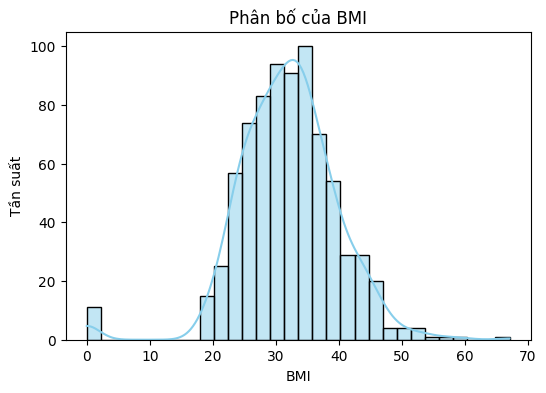

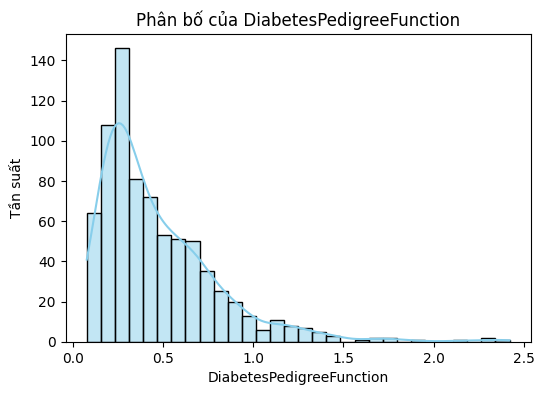

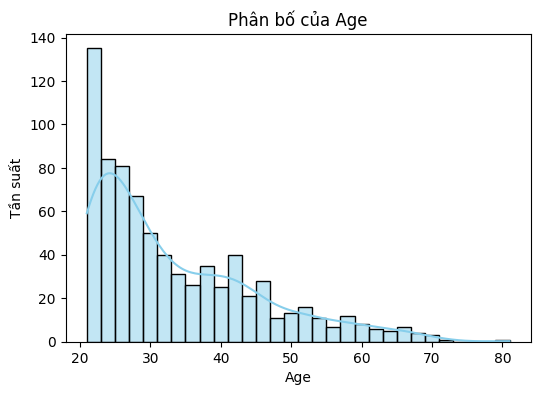

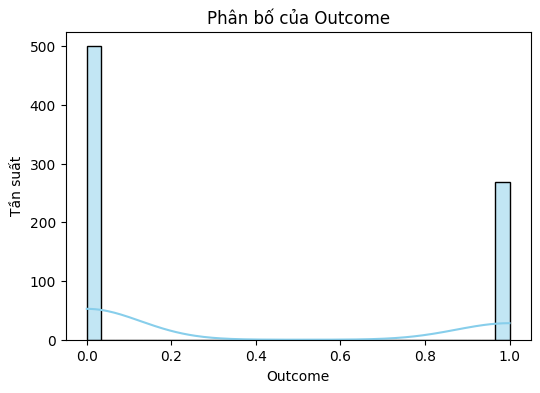

In [ ]:
num_col = df.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Ph√¢n b·ªë c·ªßa {col}')
    plt.xlabel(col)
    plt.ylabel("T·∫ßn su·∫•t")
    plt.show()
    # Bi·ªÉu ƒë·ªì ph√¢n b·ªë c·ªßa c√°c bi·∫øn s·ªë trong d·ªØ li·ªáu
    #c·ªôt d·ªçc l√† t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa c√°c gi√° tr·ªã trong c·ªôt ngang
    #kde l√† ƒë∆∞·ªùng cong m·∫≠t ƒë·ªô ∆∞·ªõc t√≠nh, gi√∫p ta th·∫•y ƒë∆∞·ª£c xu h∆∞·ªõng
    # bi·ªÉu ƒë·ªì n√†y gi√∫p ta th·∫•y ƒë∆∞·ª£c ph√¢n b·ªë c·ªßa c√°c bi·∫øn s·ªë c√≥ b·ªã l·ªách hay kh√¥ng, c√≥ outlier hay kh√¥ng
    # t·ª´ ƒë√≥ ta c√≥ th·ªÉ quy·∫øt ƒë·ªãnh c√≥ c·∫ßn x·ª≠ l√Ω d·ªØ li·ªáu hay kh√¥ng
    # L∆∞u √Ω bi·ªÉu ƒë·ªì n√†y ch·ªâ v·∫Ω ƒë∆∞·ª£c ki·ªÉu d·ªØ li·ªáu s·ªë

In [ ]:
data_copy = df.copy(deep = True) # T·∫°o b·∫£n sao c·ªßa d·ªØ li·ªáu ƒë·ªÉ tr√°nh l√†m thay ƒë·ªïi d·ªØ li·ªáu g·ªëc
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan) 
# V√¨ d·ªØ li·ªáu kh√¥ng c√≥ gi√° tr·ªã Nan m√† ch·ªâ c√≥ gi√° tr·ªã 0 m√† nh·ªØng ch·ªâ s·ªë y t·∫ø ko c√≥ gi√° tr·ªã 0 v√¥ l√Ω nghƒ©a n√™n ta thay th·∫ø gi√° tr·ªã 0 b·∫±ng Nan ƒë·ªÉ d·ªÖ d√†ng x·ª≠ l√Ω

In [ ]:
data_copy.isnull().sum() #sau khi thay ki·ªÉm tra l·∫°i c√≥ bao nhi√™u gi√° tr·ªã l√† 0 b·ªã th·∫ø th√†nh Nan

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:

#C√°ch 1 X·ª≠ L√Ω mising data b·∫±ng c√°ch thay th·∫ø gi√° tr·ªã Nan b·∫±ng gi√° tr·ªã trung b√¨nh ho·∫∑c trung v·ªã c·ªßa c·ªôt
#C√°ch n√†y √°p d·ª•ng khi d·ªØ li·ªáu b·ªã thi·∫øu kh√¥ng qu√° nhi·ªÅu (d∆∞·ªõi 30%)
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True) #Thay th·∫ø gi√° tr·ªã Nan b·∫±ng gi√° tr·ªã trung b√¨nh c·ªßa c·ªôt
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(),inplace=True)#Thay th·∫ø gi√° tr·ªã Nan b·∫±ng gi√° tr·ªã trung b√¨nh c·ªßa c·ªôt
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(),inplace=True)#Thay th·∫ø gi√° tr·ªã Nan b·∫±ng gi√° tr·ªã trung v·ªã c·ªßa c·ªôt
data_copy['Insulin'].fillna(data_copy['Insulin'].median(),inplace=True)#Thay th·∫ø gi√° tr·ªã Nan b·∫±ng gi√° tr·ªã trung v·ªã c·ªßa c·ªôt
data_copy['BMI'].fillna(data_copy['BMI'].mean(),inplace=True)#Thay th·∫ø gi√° tr·ªã Nan b·∫±ng gi√° tr·ªã trung b√¨nh c·ªßa c·ªôt


C:\Users\HP\AppData\Local\Temp\ipykernel_13152\268962626.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True) #Thay th·∫ø gi√° tr·ªã Nan b·∫±ng gi√° tr·ªã trung b√¨nh c·ªßa c·ªôt
C:\Users\HP\AppData\Local\Temp\ipykernel_13152\268962626.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the int

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # K√≠ch ho·∫°t IterativeImputer (ƒëang l√† experimental trong sklearn)
from sklearn.impute import IterativeImputer

# üîπ C√°ch 2: X·ª≠ l√Ω missing data b·∫±ng MICE (Multiple Imputation by Chained Equations)

# Gi·∫£ s·ª≠ df ƒë√£ replace 0 b·∫±ng NaN tr∆∞·ªõc ƒë√≥
data_copy_MICE = df.copy(deep=True)   # T·∫°o m·ªôt b·∫£n sao dataframe g·ªëc ƒë·ªÉ kh√¥ng l√†m thay ƒë·ªïi d·ªØ li·ªáu ban ƒë·∫ßu

# C√°c c·ªôt c√≥ ch·ª©a missing (NaN sau khi thay 0)
cols_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Thay th·∫ø gi√° tr·ªã 0 th√†nh NaN trong c√°c c·ªôt tr√™n
data_copy_MICE[cols_missing] = data_copy_MICE[cols_missing].replace(0, np.nan)

# T·∫°o MICE imputer
# - random_state=0: ƒë·ªÉ t√°i l·∫≠p k·∫øt qu·∫£ gi·ªëng nhau khi ch·∫°y l·∫°i
# - max_iter=10: ch·∫°y 10 v√≤ng l·∫∑p d·ª± ƒëo√°n gi√° tr·ªã missing
# - sample_posterior=True: m·ªói l·∫ßn d·ª± ƒëo√°n s·∫Ω c√≥ th√™m ch√∫t ng·∫´u nhi√™n (Bayesian), 
#   gi√∫p t·∫°o ra nhi·ªÅu b·ªô d·ªØ li·ªáu h·ª£p l√Ω thay v√¨ ch·ªâ m·ªôt gi√° tr·ªã duy nh·∫•t
imp = IterativeImputer(random_state=0, max_iter=10, sample_posterior=True)

# Ch·ªâ √°p d·ª•ng Imputer cho c√°c c·ªôt numeric c√≥ missing
# MICE s·∫Ω l·∫ßn l∆∞·ª£t d√πng c√°c c·ªôt c√≤n l·∫°i ƒë·ªÉ d·ª± ƒëo√°n gi√° tr·ªã b·ªã thi·∫øu c·ªßa t·ª´ng c·ªôt
data_copy_MICE[cols_missing] = imp.fit_transform(data_copy_MICE[cols_missing])

# In 5 d√≤ng ƒë·∫ßu ti√™n sau khi ƒë√£ x·ª≠ l√Ω missing
print(data_copy_MICE.head())



   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0         35.000  404.235687  33.6   
1            1     85.0           66.0         29.000  101.785577  26.6   
2            8    183.0           64.0         20.114  242.983223  23.3   
3            1     89.0           66.0         23.000   94.000000  28.1   
4            0    137.0           40.0         35.000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


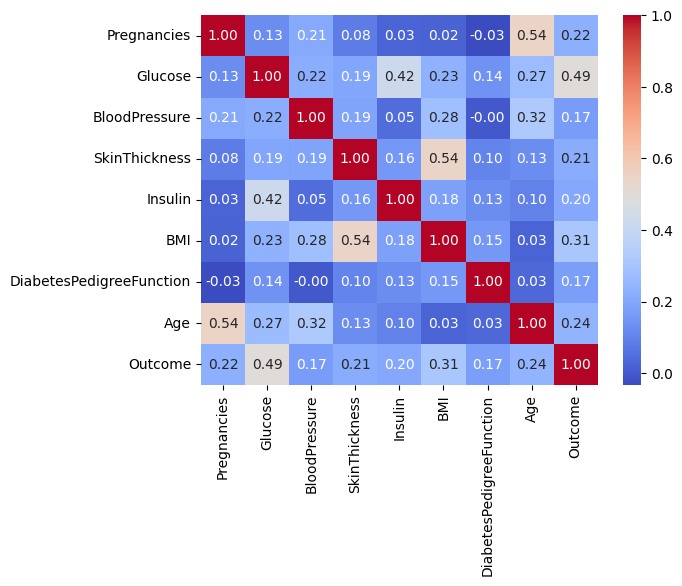

In [ ]:
temp = data_copy.select_dtypes(include=[np.number])
#Bi·ªÉu ƒë·ªì heatmap th·ªÉ hi·ªán m·ªëi t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn s·ªë
corr = temp.corr()
plt.Figure(dpi=30)
sns.heatmap(corr,annot=True,fmt='.2f', cmap='coolwarm')
plt.show()
#C√°ch ƒë·ªçc bi·ªÉu ƒë·ªì:
#D·ª±a v√†o gi√° tr·ªã ƒë·ªÉ t√≠nh ƒë·ªô t∆∞∆°ng qua gi·ªØa c√°c bi·∫øn s·ªë
#gi√° tr·ªã s·∫Ω t·ª´ -1 ƒë·∫øn 1
#gi√° tr·ªã d∆∞∆°ng th√¨ n·∫øu bi·∫øn n√†y tƒÉng th√¨ bi·∫øn kia c≈©ng tƒÉng
#gi√° tr·ªã √¢m th√¨ n·∫øu bi·∫øn n√†y tƒÉng th√¨ bi·∫øn kia gi·∫£m
#gi√° tr·ªã g·∫ßn 0 th√¨ hai bi·∫øn kh√¥ng c√≥ m·ªëi t∆∞∆°ng quan
#vd: Glucose v√† Outcome c√≥ gi√° tr·ªã 0.49 th√¨ khi Glucose tƒÉng th√¨ kh·∫£ nƒÉng b·ªã ti·ªÉu ƒë∆∞·ªùng c≈©ng tƒÉng

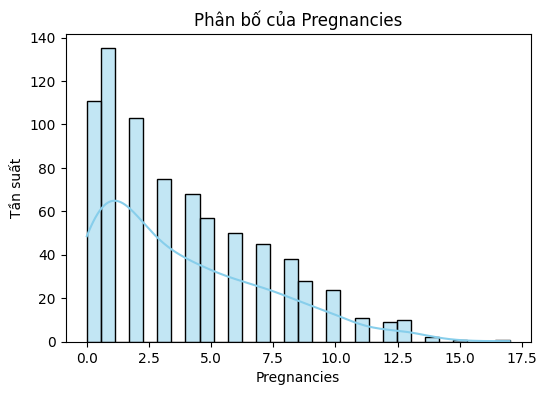

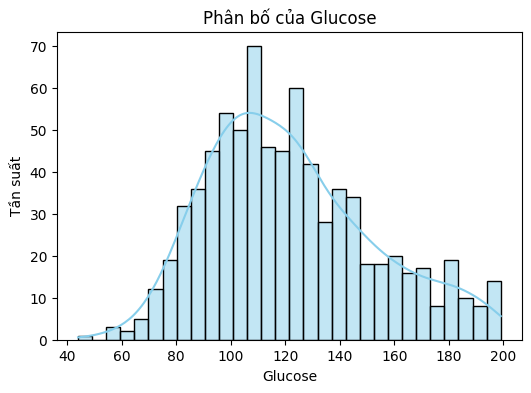

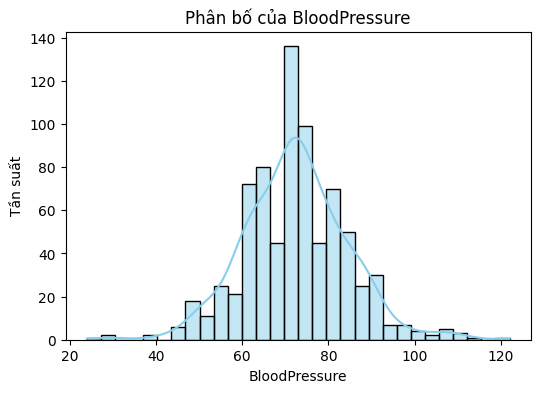

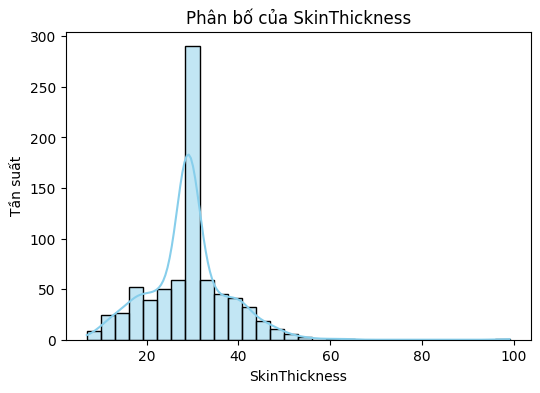

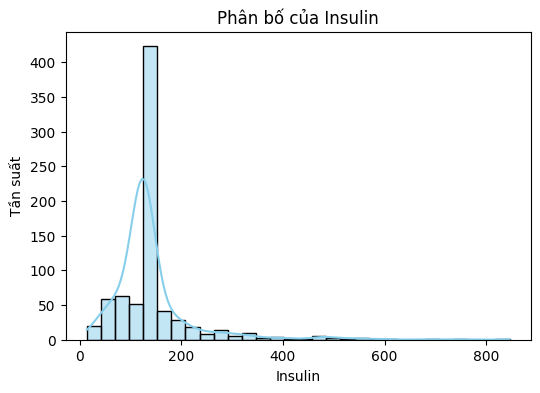

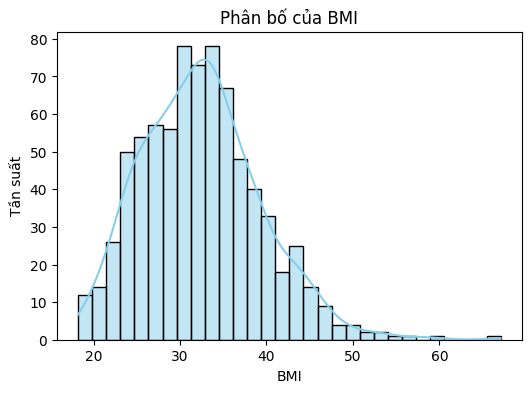

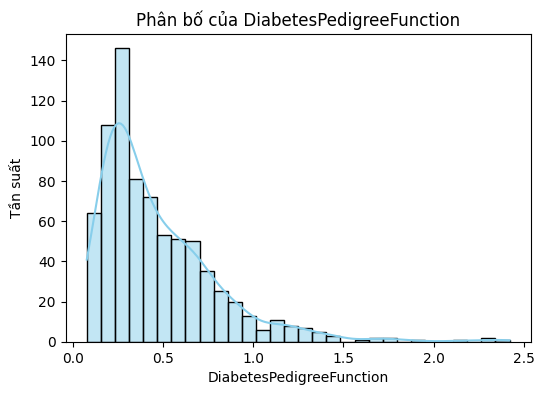

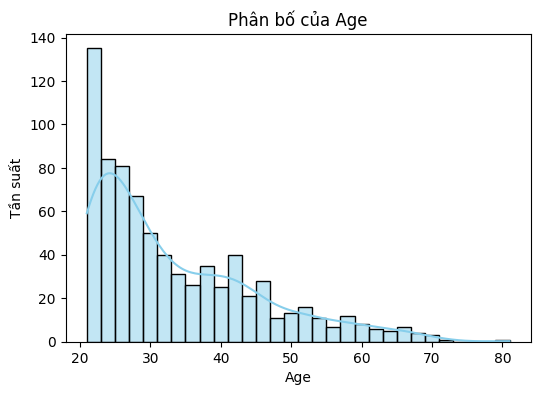

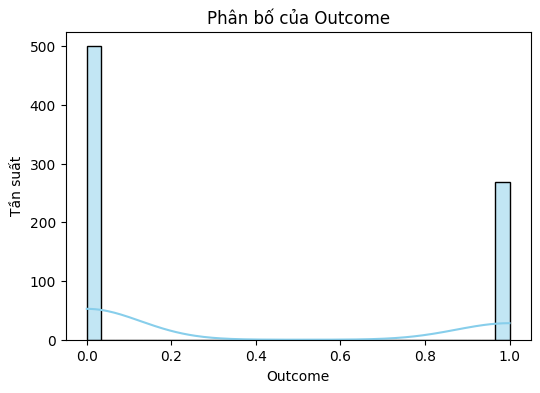

In [ ]:
num_col = data_copy.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(data_copy[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Ph√¢n b·ªë c·ªßa {col}')
    plt.xlabel(col)
    plt.ylabel("T·∫ßn su·∫•t")
    plt.show()
    # ki·ªÉm tra l·∫°i ph√¢n b·ªë sau khi ƒë√£ x·ª≠ l√Ω missing data b·∫±ng c√°ch thay th·∫ø b·∫±ng mean ho·∫∑c median

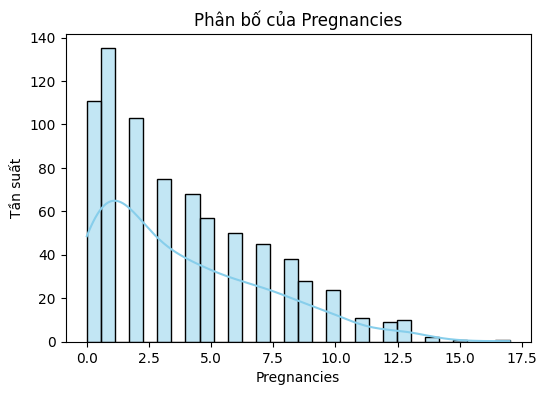

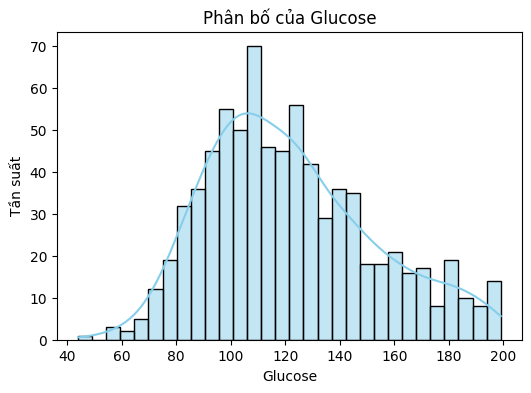

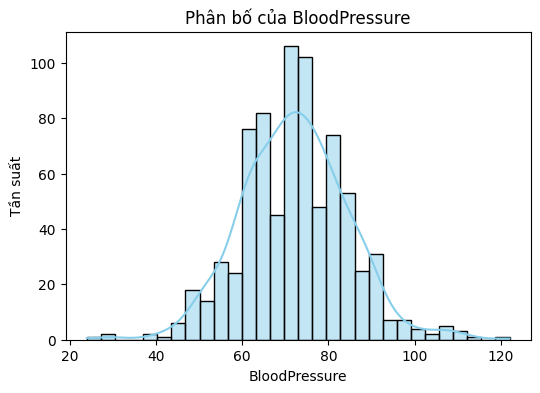

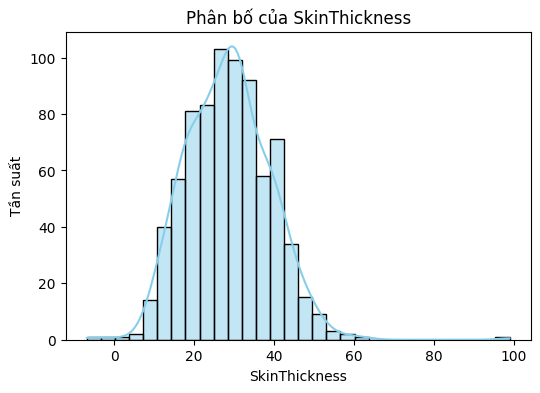

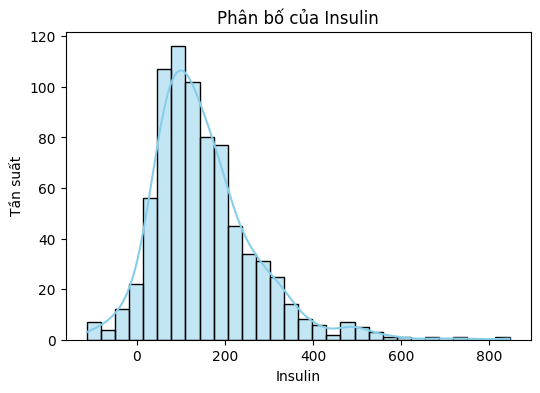

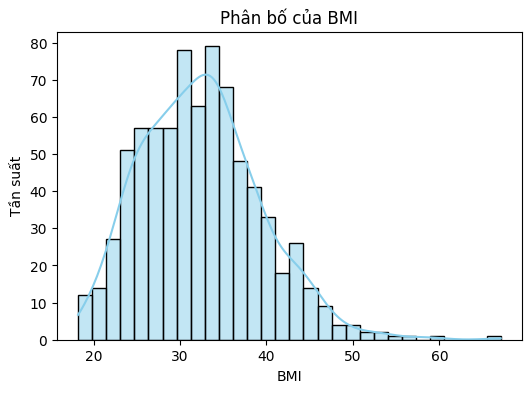

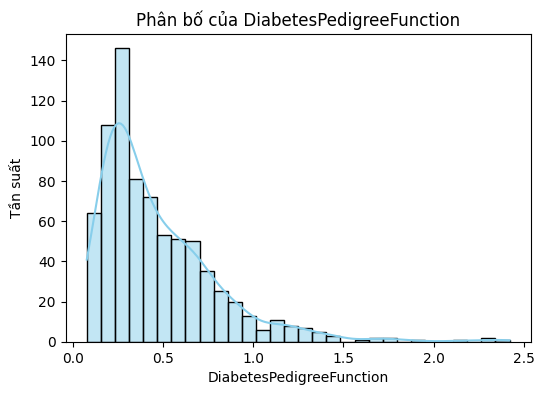

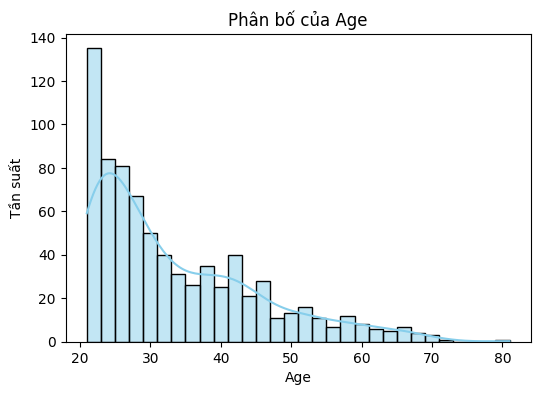

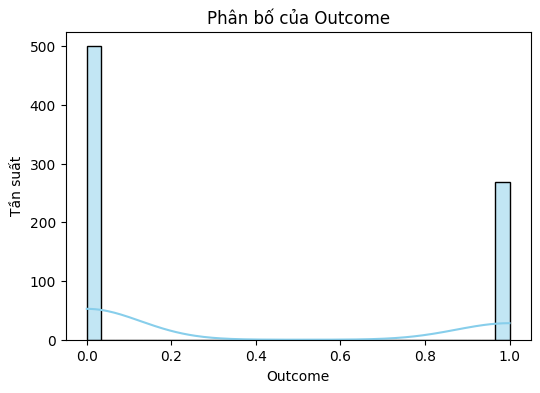

In [ ]:
num_col = data_copy_MICE.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(data_copy_MICE[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Ph√¢n b·ªë c·ªßa {col}')
    plt.xlabel(col)
    plt.ylabel("T·∫ßn su·∫•t")
    plt.show()
    # ki·ªÉm tra l·∫°i ph√¢n b·ªë sau khi ƒë√£ x·ª≠ l√Ω missing data b·∫±ng MICE

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


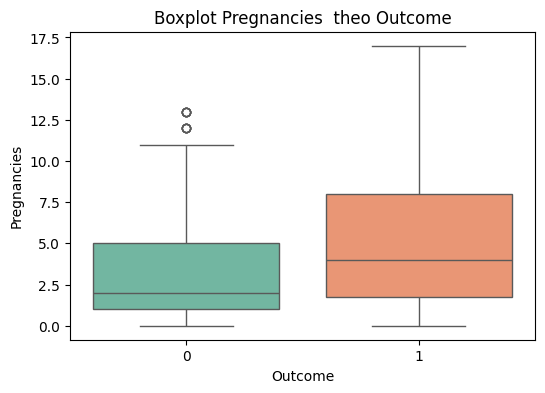

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


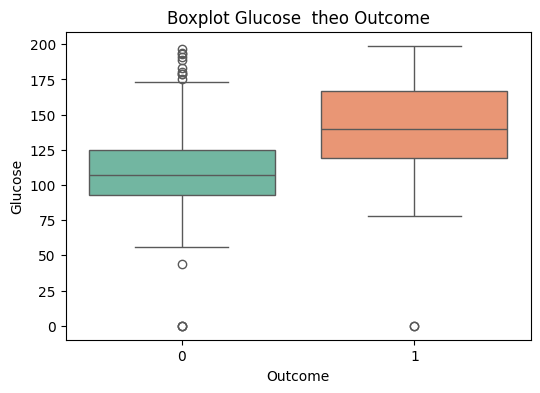

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


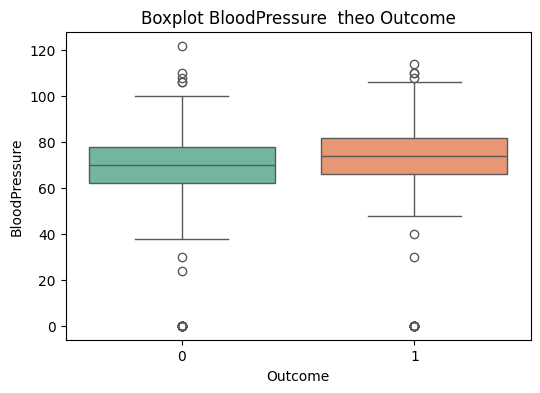

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


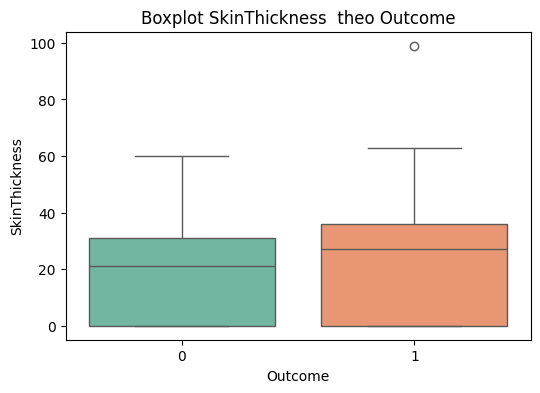

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


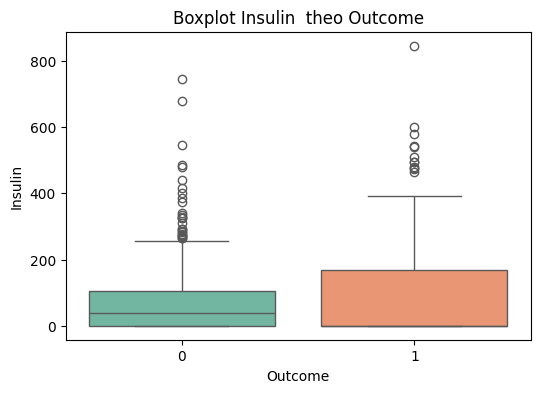

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


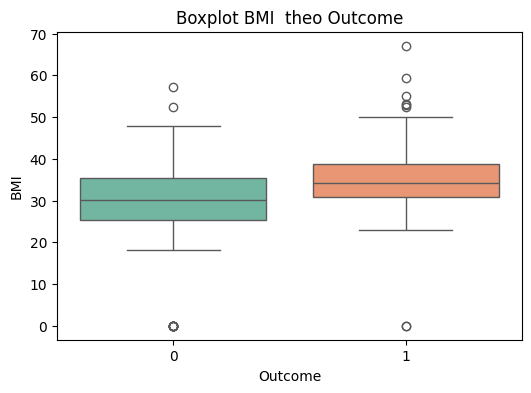

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


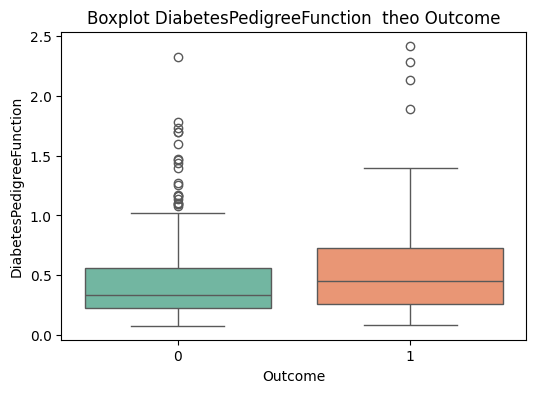

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


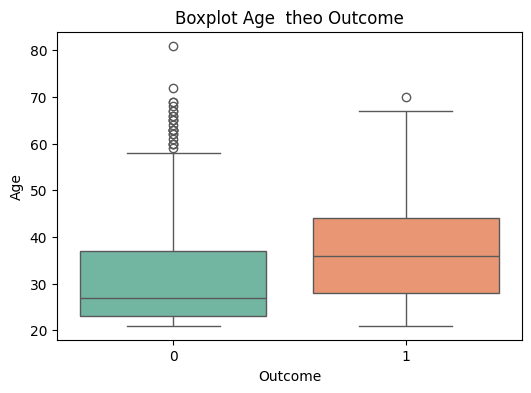

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


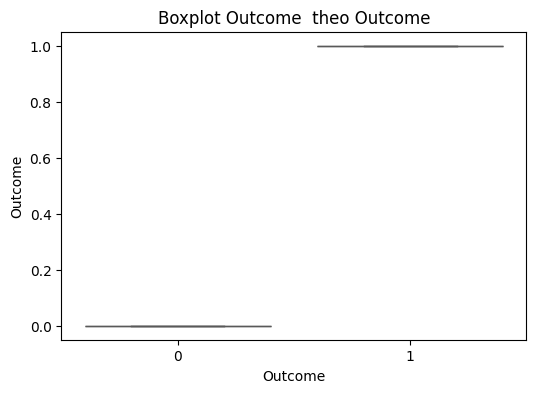

In [ ]:
# Bi·ªÉu ƒë·ªì boxplot th·ªÉ hi·ªán ph√¢n b·ªë c·ªßa c√°c bi·∫øn s·ªë theo bi·∫øn ph√¢n lo·∫°i Outcome C√°ch 1
num_col = data_copy.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")
    plt.title(f"Boxplot {col}  theo Outcome")
    plt.show()
#C√°ch ƒë·ªçc bi·ªÉu ƒë·ªì:
#C·ªôt d·ªçc l√† gi√° tr·ªã c·ªßa bi·∫øn s·ªë, c·ªôt ngang l√† bi·∫øn ph√¢n lo·∫°i Outcome
#ƒê∆∞·ªùng ngang ·ªü gi·ªØa h·ªôp l√† median (gi√° tr·ªã ·ªü gi·ªØa):gi√° tr·ªã trung v·ªã c·ªßa bi·∫øn ƒë√≥ trong m·ªói nh√≥m Outcome.
#M·∫•y ch·∫•m l√† gi√° tr·ªã nhi·ªÖu b·∫•t th∆∞·ªùng
#2 c√°i ƒë∆∞·ªùng ngang ·ªü tr√™n v√† d∆∞·ªõi h·ªôp l√† gi√° tr·ªã gi·ªõi h·∫°n tr√™n v√† d∆∞·ªõi (kh√¥ng ph·∫£i max v√† min)


C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


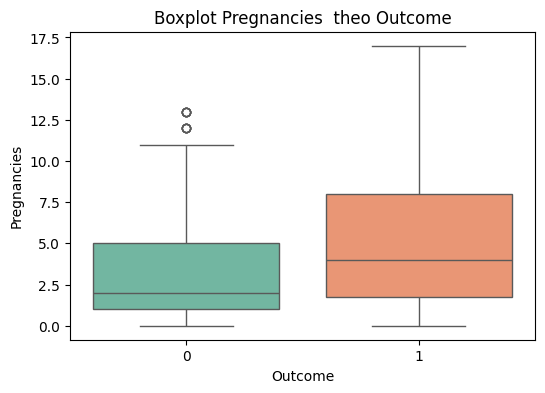

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


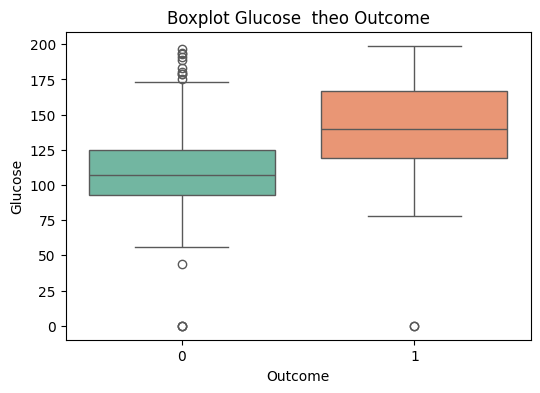

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


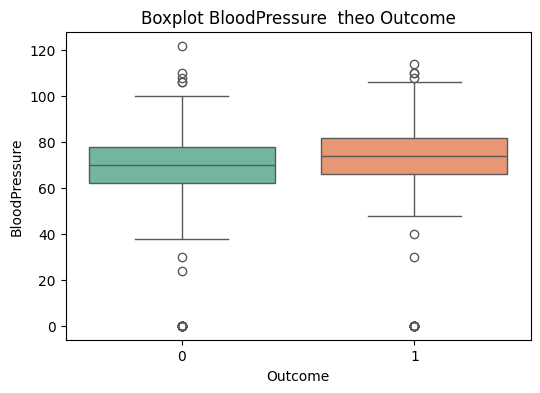

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


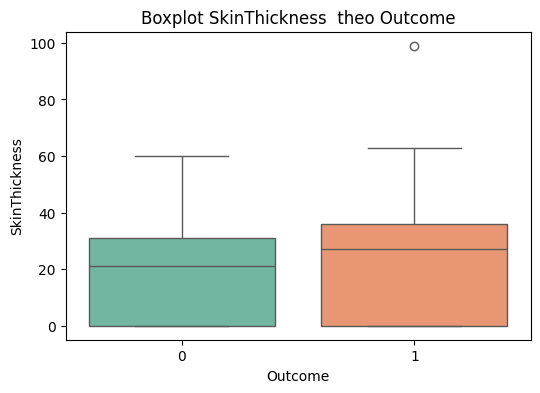

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


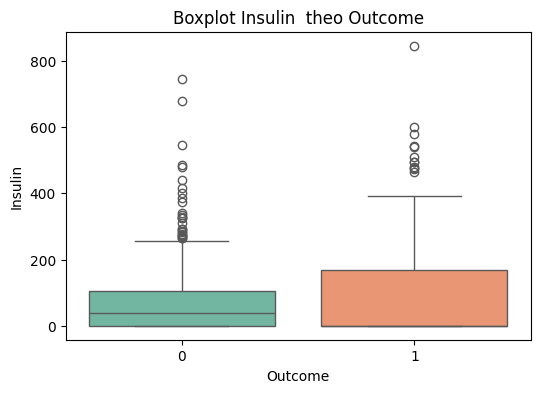

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


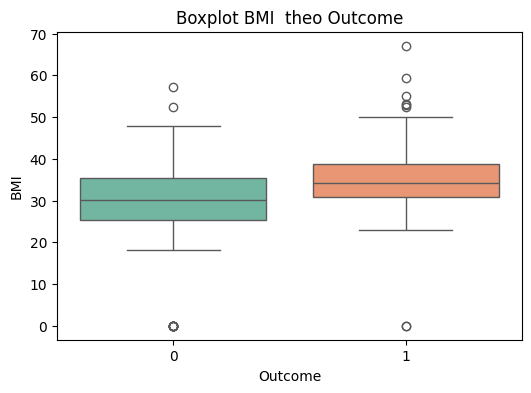

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


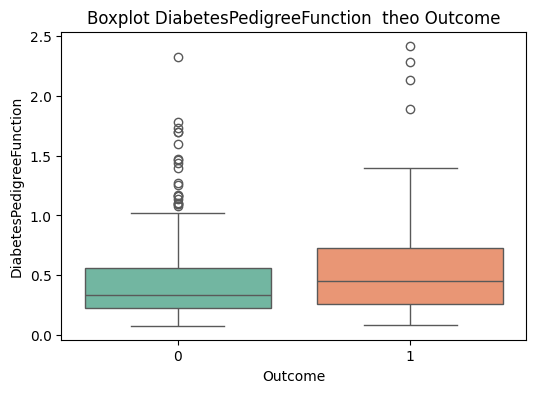

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


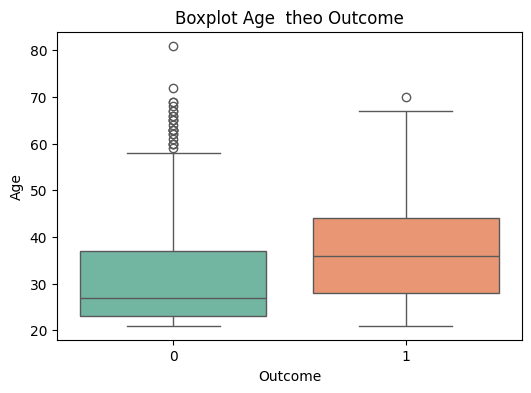

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


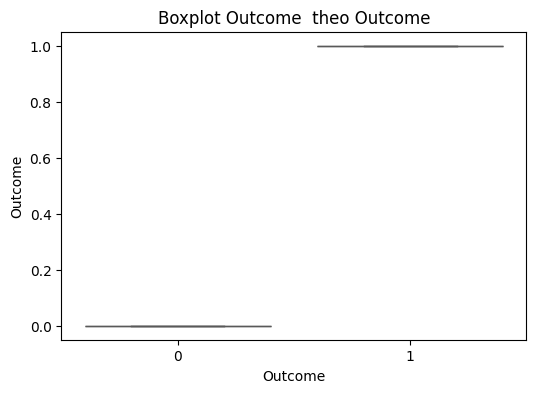

In [ ]:
#c√°ch 2
num_col = data_copy_MICE.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")
    plt.title(f"Boxplot {col}  theo Outcome")
    plt.show()

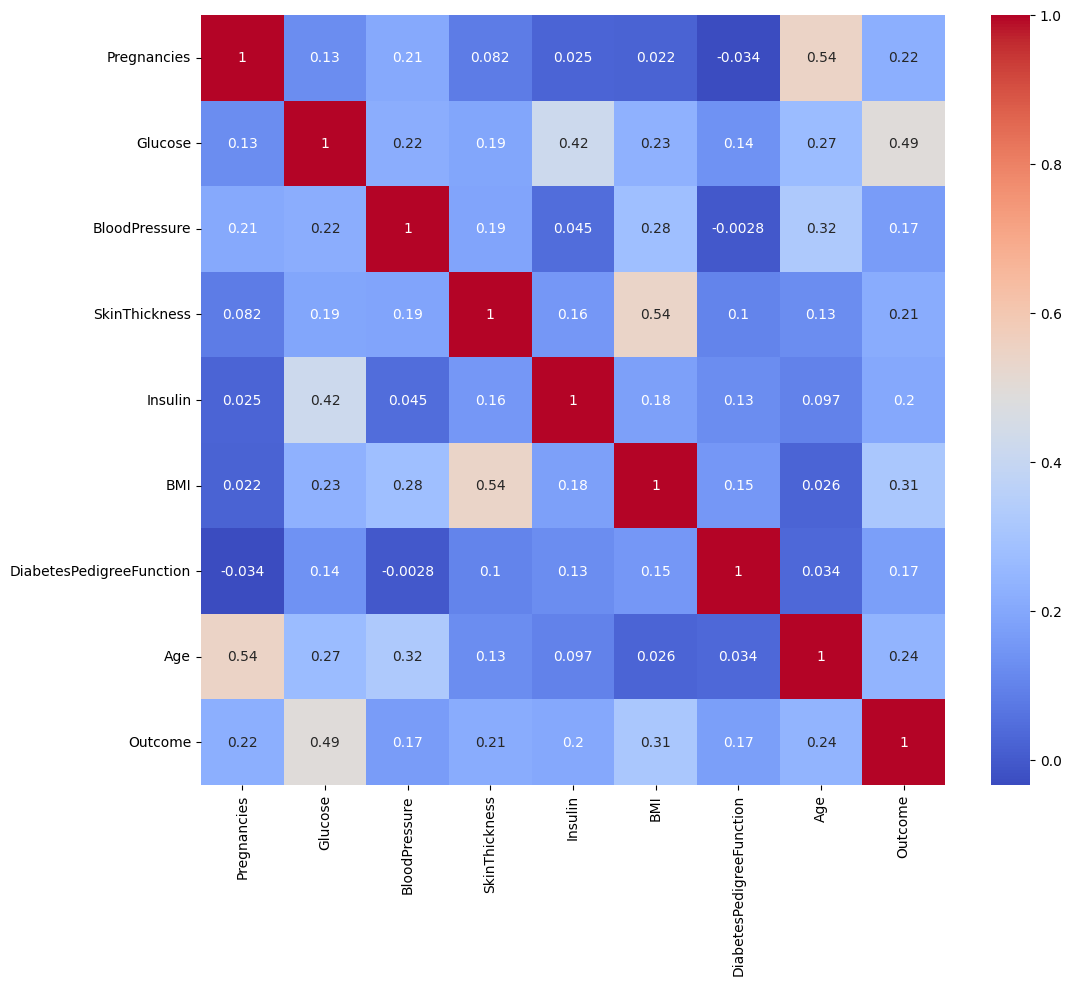

In [ ]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='coolwarm')
# ki·ªÉm tra t√≠nh t∆∞∆°ng quan sau khi ƒë√£ x·ª≠ l√Ω missing data c√°ch 1

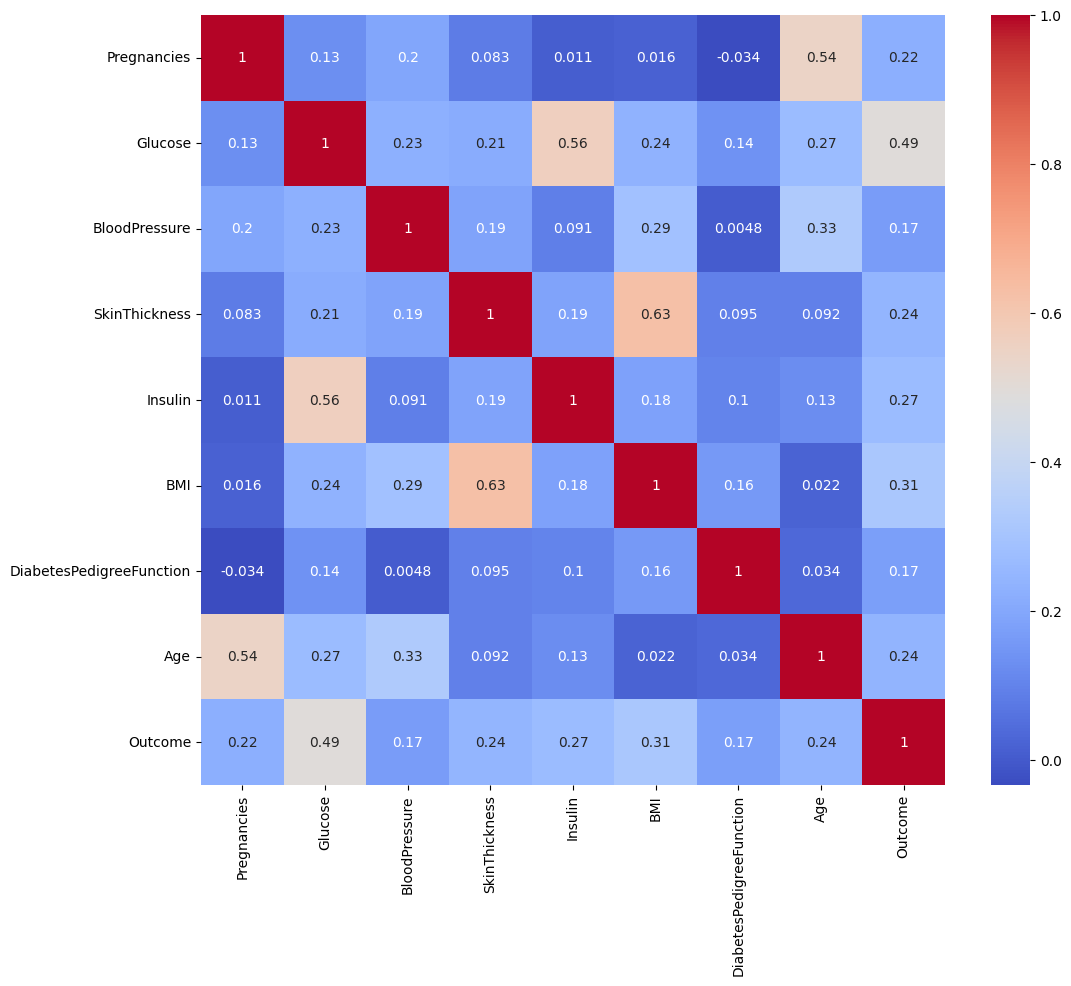

In [ ]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(data_copy_MICE.corr(), annot=True,cmap ='coolwarm')
# kiem tra t√≠nh t∆∞∆°ng quan sau khi ƒë√£ x·ª≠ l√Ω missing data c√°ch 2

In [ ]:
from sklearn.model_selection import train_test_split

X = data_copy.drop('Outcome', axis=1)
y = data_copy['Outcome']

X_MIKE = data_copy_MICE.drop('Outcome', axis=1)
y_MIKE = data_copy_MICE['Outcome']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Chu·∫©n b·ªã d·ªØ li·ªáu cho m√¥ h√¨nh ML
X_train_MIKE, X_val_MIKE, y_train_MIKE, y_val_MIKE = train_test_split(
    X_MIKE, y_MIKE, test_size=0.2, random_state=42, stratify=y
)



In [ ]:
#M√¥ h√¨nh c√°ch 1
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model = LGBMClassifier(objective="binary",        
    boosting_type="gbdt",
    n_estimators=200,
    num_leaves=63,
    max_depth=-1,
    learning_rate=0.05,
    feature_fraction=0.9,
    random_state=42)
#khoi t·∫°o m√¥ h√¨nh LightGBM v·ªõi c√°c si√™u tham s·ªë ƒë√£ ƒë∆∞·ª£c ƒëi·ªÅu ch·ªânh
model.fit(X_train, y_train) #Cho d·ªØ li·ªáu v√†o m√¥ h√¨nh ƒë·ªÉ hu·∫•n luy·ªán

y_val_pred = model.predict(X_val) #D·ª± ƒëo√°n tr√™n t·∫≠p validation


y_pred = model.predict(X_val) #D·ª± ƒëo√°n nh√£n tr√™n t·∫≠p validation
y_prob = model.predict_proba(X_val)[:,1] #D·ª± ƒëo√°n x√°c su·∫•t thu·ªôc l·ªõp positive (1)

acc = accuracy_score(y_val, y_pred) # T√≠nh ƒë·ªô ch√≠nh x√°c
f1 = f1_score(y_val, y_pred) #T√≠nh ƒë·ªô t∆∞∆°ng quan gi·ªØa recall v√† precision
roc_auc = roc_auc_score(y_val, y_prob) #T√≠nh di·ªán t√≠ch d∆∞·ªõi ƒë∆∞·ªùng cong ROC


print(f"  Accuracy: {acc:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  ROC AUC:  {roc_auc:.4f}")
print("-" * 30)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [ ]:
#M√¥ h√¨nh c√°ch 2
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model = LGBMClassifier(objective="binary",        
    boosting_type="gbdt",
    n_estimators=200,
    num_leaves=63,
    max_depth=-1,
    learning_rate=0.05,
    feature_fraction=0.9,
    random_state=42)
model.fit(X_train_MIKE, y_train_MIKE)

y_val_pred = model.predict(X_val_MIKE)


y_pred = model.predict(X_val_MIKE)
y_prob = model.predict_proba(X_val_MIKE)[:,1]

acc = accuracy_score(y_val_MIKE, y_pred)
f1 = f1_score(y_val_MIKE, y_pred)
roc_auc = roc_auc_score(y_val_MIKE, y_prob)


print(f"  Accuracy: {acc:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  ROC AUC:  {roc_auc:.4f}")
print("-" * 30)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi